<a href="https://colab.research.google.com/github/mirudula009/Image-Recognition/blob/main/Image_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np 
import pandas as pd 


import os



 **Importing all Libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_csv('gdrive/My Drive/fer2013.csv')

In [5]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [6]:
x_data = data['pixels']
y_data = data['emotion']

**emotion_labels = ['0:angry','1:disgust','2:fear','3:Happy', '4:Sad','5:Surprise', '7:Neutral']**

**DATA REPRESENTING ON BAR GRAPH**

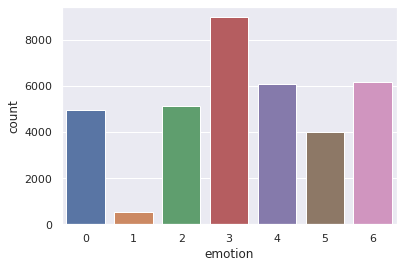

In [7]:

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

**BALINCING THE DATA USING RANDOM OVER SAMPLING**

In [8]:

oversampler = RandomOverSampler(sampling_strategy='auto')
#reshape(-1,1), reshaping  unknown count of the rows and in 1 column##values
x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [9]:
y_data.value_counts() 

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [10]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    109 100 93 92 75 71 60 58 63 70 74 86 87 66 66...
62919    20 18 7 2 20 31 32 32 34 28 36 47 37 43 43 43 ...
62920    101 105 106 92 63 49 41 42 42 45 63 89 98 94 9...
62921    18 18 19 18 21 25 24 24 30 36 75 99 103 128 13...
62922    20 5 0 5 26 46 80 106 89 94 81 80 77 76 87 103...
Length: 62923, dtype: object

In [11]:

x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255
x_data[:10] 

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [12]:

x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape 

(62923, 48, 48, 1)

In [13]:
y_data = np.array(y_data)
 
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

**SPLITING THE DATASET INTO TRAIN AND TEST**

In [14]:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)


***BUILDING A MODEL***

In [15]:
model = Sequential([
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.6),
    Dense(7, activation = 'softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 64)        0

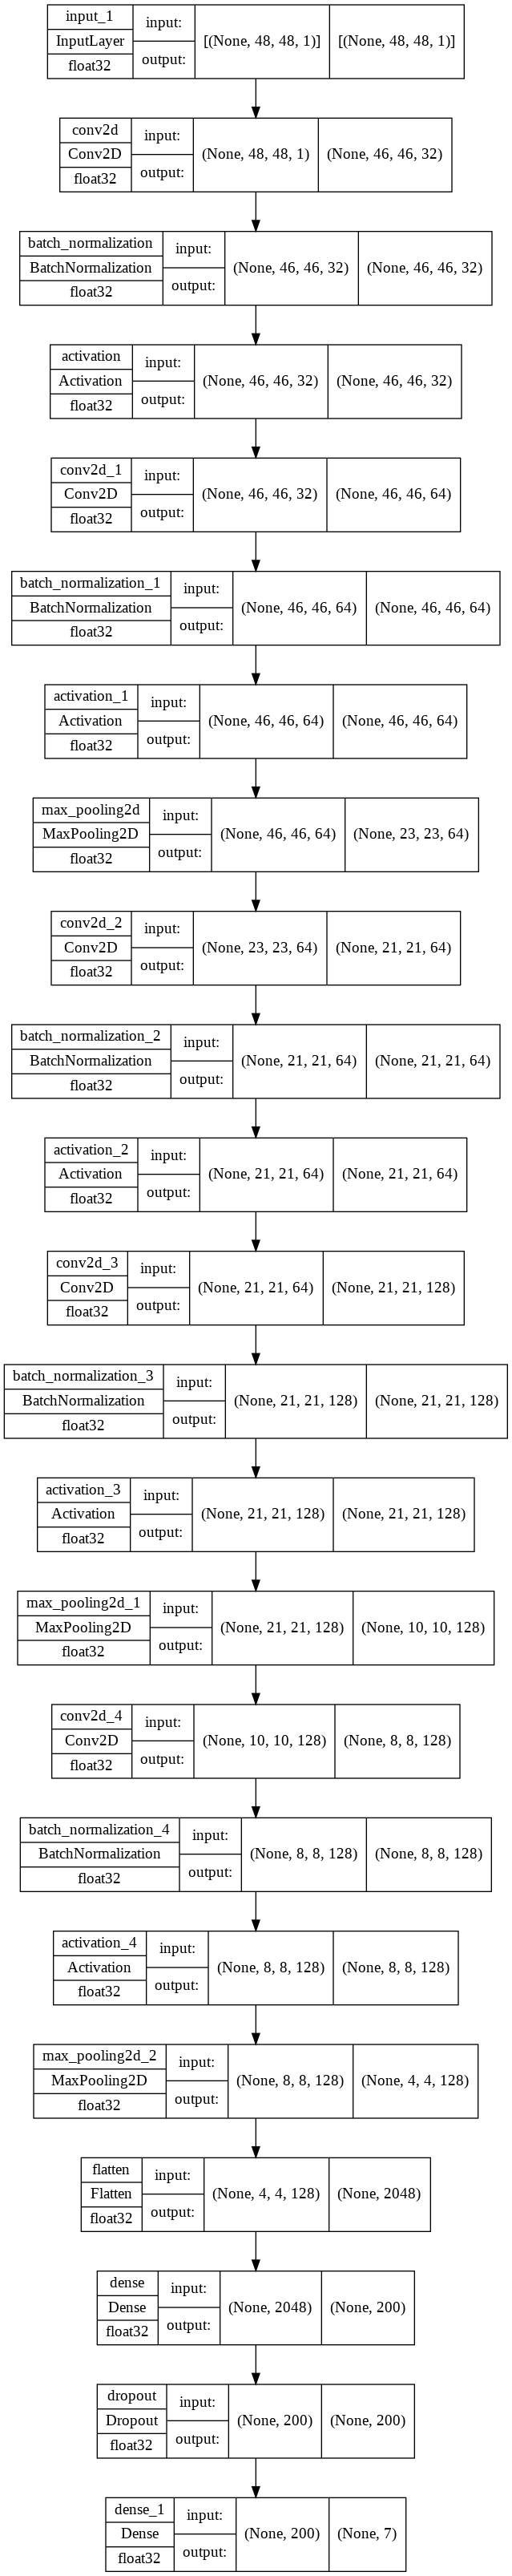

In [16]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

**MODEL COMPILING**

In [17]:
model.compile(optimizer = Adam(learning_rate=0.0001,decay=1e-6),loss = 'categorical_crossentropy',metrics = ['accuracy'])


**CALLBACKS**

In [18]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [19]:

y_train = np_utils.to_categorical(y_train, 7)
y_train.shape

(56630, 7)

In [20]:
y_test = np_utils.to_categorical(y_test, 7)
y_test.shape

(6293, 7)

***FITTING THE MODEL***

In [21]:
history=model.fit(x_train, y_train, epochs = 40, validation_data=(x_test, y_test),callbacks = callbacks,)


Epoch 1/40
1770/1770 [==============================] - 1153s 650ms/step - loss: 1.7266 - accuracy: 0.3226 - val_loss: 1.4282 - val_accuracy: 0.4737 - lr: 1.0000e-04
Epoch 2/40
1770/1770 [==============================] - 1129s 638ms/step - loss: 1.3850 - accuracy: 0.4697 - val_loss: 1.1786 - val_accuracy: 0.5519 - lr: 1.0000e-04
Epoch 3/40
1770/1770 [==============================] - 1123s 635ms/step - loss: 1.2071 - accuracy: 0.5366 - val_loss: 1.0703 - val_accuracy: 0.5949 - lr: 1.0000e-04
Epoch 4/40
1770/1770 [==============================] - 1063s 600ms/step - loss: 1.0818 - accuracy: 0.5871 - val_loss: 1.0111 - val_accuracy: 0.6170 - lr: 1.0000e-04
Epoch 5/40
1770/1770 [==============================] - 1001s 566ms/step - loss: 0.9911 - accuracy: 0.6208 - val_loss: 0.9081 - val_accuracy: 0.6625 - lr: 1.0000e-04
Epoch 6/40
1770/1770 [==============================] - 992s 561ms/step - loss: 0.9133 - accuracy: 0.6554 - val_loss: 0.9287 - val_accuracy: 0.6545 - lr: 1.0000e-04
Epoch

**EVALUATION**

In [22]:
model.evaluate(x_test,y_test)

197/197 [==============================] - 29s 147ms/step - loss: 1.0579 - accuracy: 0.8406


[1.0579431056976318, 0.8406165838241577]

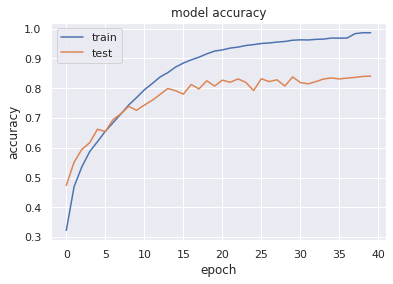

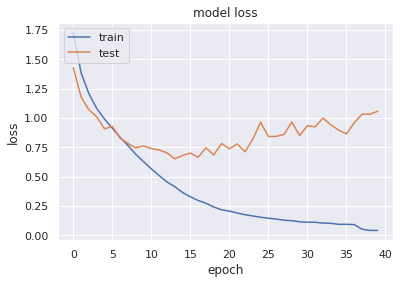

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
##emotion_labels = ['0:angry','1:disgust','2:fear','3:Happy', '4:Sad','5:Surprise', '7:Neutral']
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

[6, 5, 5, 6, 1, 0, 0, 4, 1, 6]

In [25]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       935
           1       1.00      1.00      1.00       895
           2       0.81      0.82      0.81       880
           3       0.81      0.76      0.79       906
           4       0.68      0.80      0.73       888
           5       0.95      0.94      0.95       869
           6       0.81      0.74      0.77       920

    accuracy                           0.84      6293
   macro avg       0.84      0.84      0.84      6293
weighted avg       0.84      0.84      0.84      6293



Text(66.5, 0.5, 'Truth')

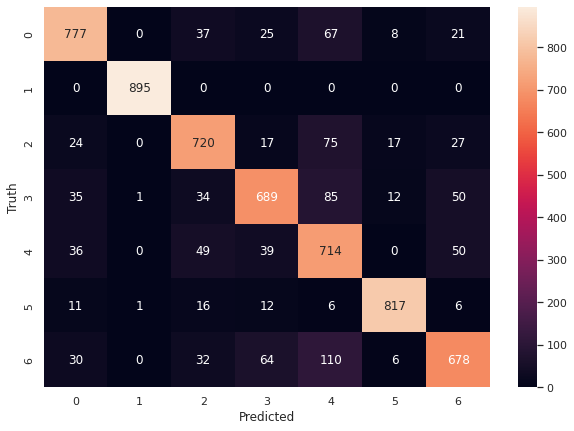

In [27]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Saving The Model**

In [28]:
model.save('fer2.h5')